In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data set saved on desktop, which is in tab seperated values format(\t)
Red_Wine=pd.read_csv(r'C:\Users\invra\Desktop\REDWINE.csv',sep='\t')

In [3]:
#data set
Red_Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


there are 1599 rows and 12 columns

In [4]:
#getting the head and last 5 rows of the data set
Red_Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
Red_Wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
#getting inforamtion about the dataset
Red_Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The above information gives the information that all the columns are float type except quality column, which is an integer

In [7]:
#checking the column names of the dataset
print(Red_Wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
Red_Wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

There are 6 different quality of wine present in the data set

In [9]:
#checking the values in the quality column(target column)
Red_Wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Under this quality column only 5,6,7 quality has more data when compared to the others

In [10]:
Red_Wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
#getting the statistical data of all the columns of datset set
Red_Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above statistical data its clear that there is mean more than median, so this a skewed data

There is a Huge difference between 75th percentile and the maximum values in the columns
1.residual sugar
2.free sulfur dioxide
3.total sulfur dioxide

This indicates that there will be outliers in these columns

# Checking any missing values in the data set

<AxesSubplot:>

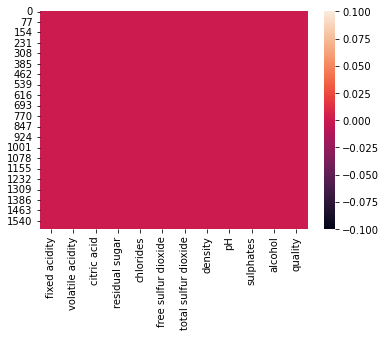

In [12]:
#to check missing values
sns.heatmap(Red_Wine.isnull())

There are no missing values in the data set

In [13]:
Red_Wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#lets consider data set as df
df=Red_Wine

In [15]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
# to check correlation
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

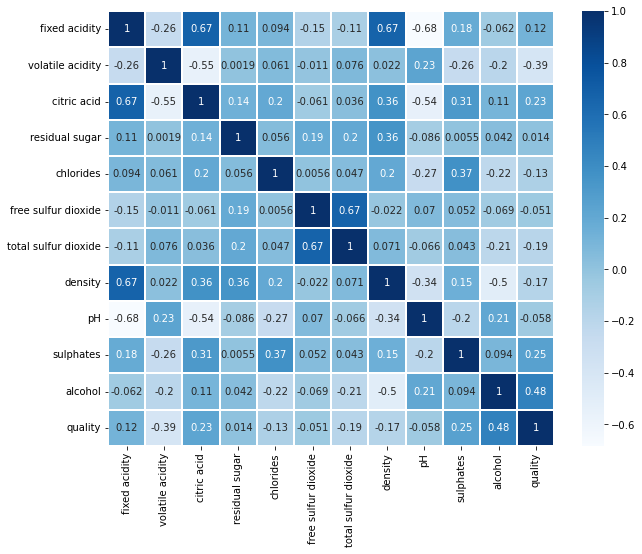

In [17]:
#PLotting heat map to visualise the correlation
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Blues', annot=True, linewidth=.3)

Dark blue coloured ones are highly correlated

In [18]:
#getting the correlation of the quality column with the other columns
dfcor['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

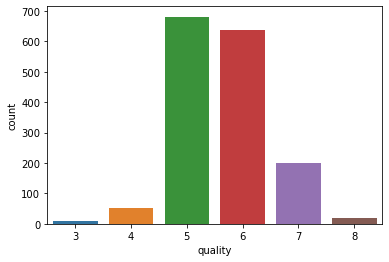

In [19]:
sns.countplot(df['quality'])

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

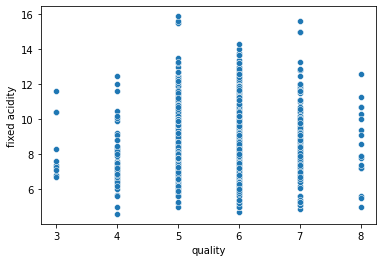

In [20]:
sns.scatterplot(x='quality', y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

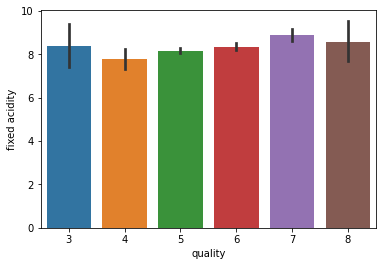

In [21]:
sns.barplot(x='quality', y='fixed acidity', linewidth=3, errcolor='.2', data=df)

The above bar graph indicates that there is no realation with increasing or decreasing fixed acidity on quality, almost same for all qualities

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

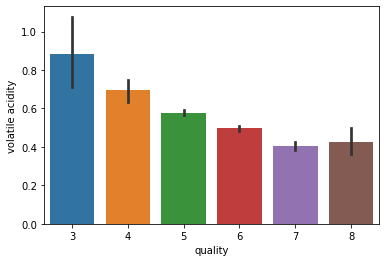

In [22]:
sns.barplot(x='quality', y='volatile acidity', linewidth=3, errcolor='.2', data=df)

This indicates significance of volatile acidity effect on quality, quality increasing with decrease in volatile acidity

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

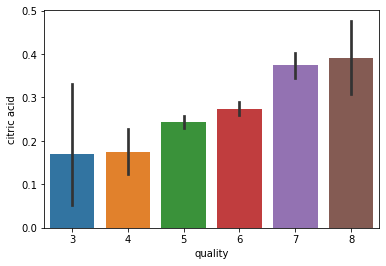

In [23]:
sns.barplot(x='quality', y='citric acid', linewidth=3, errcolor='.2', data=df)

This shows the positive relation or effect of citric acid on quality, quality increasing with increase in citric acid

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

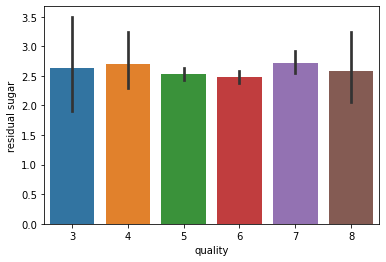

In [24]:
sns.barplot(x='quality', y='residual sugar', linewidth=3, errcolor='.2', data=df)

This indicates no much relation between the quality and   residual sugar

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

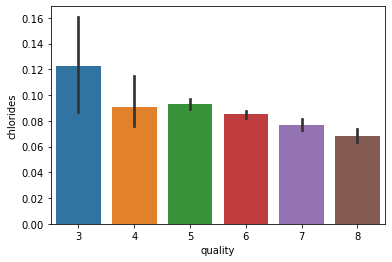

In [25]:
sns.barplot(x='quality', y='chlorides', linewidth=3, errcolor='.2', data=df)

chlorides has a litle impact on quality, decrease in chlorides improves wine quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

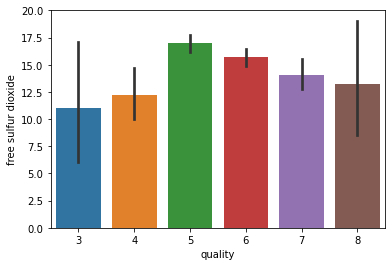

In [26]:
sns.barplot(x='quality', y='free sulfur dioxide', linewidth=3, errcolor='.2', data=df)

It is having both positive and negativde relation between free sulfur dioxide and quality

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

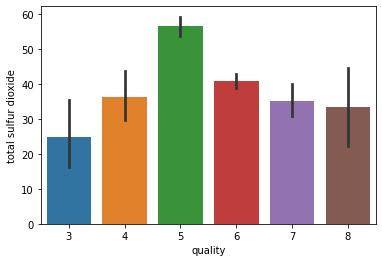

In [27]:
sns.barplot(x='quality', y='total sulfur dioxide', linewidth=3, errcolor='.2', data=df)

It is having both positive and negativde relation between TSD and quality

<AxesSubplot:xlabel='quality', ylabel='density'>

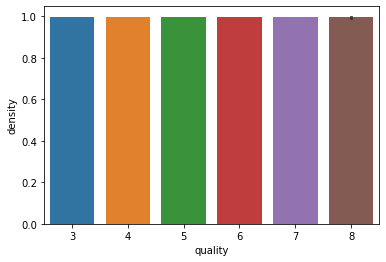

In [28]:
sns.barplot(x='quality', y='density', linewidth=3, errcolor='.2', data=df)

It indicates there is no relation between density and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

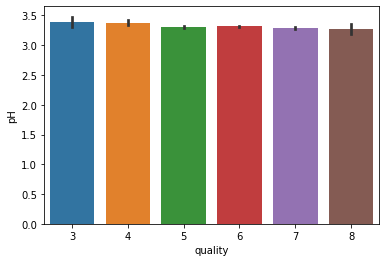

In [29]:
sns.barplot(x='quality', y='pH', linewidth=3, errcolor='.2', data=df)

It indicates there is no relation between pH and quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

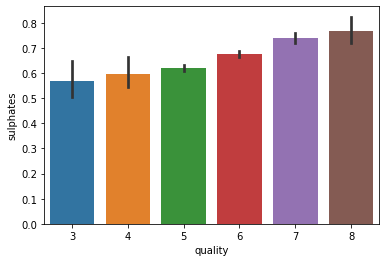

In [30]:
sns.barplot(x='quality', y='sulphates', linewidth=3, errcolor='.2', data=df)

This indicates the raise in quality with raise in sulphates

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

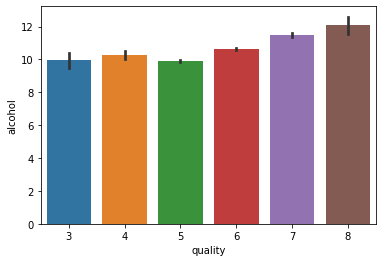

In [31]:
sns.barplot(x='quality', y='alcohol', linewidth=3, errcolor='.2', data=df)

Alchohol has slight positive relation with quality, increase in alchohol increasing the quality

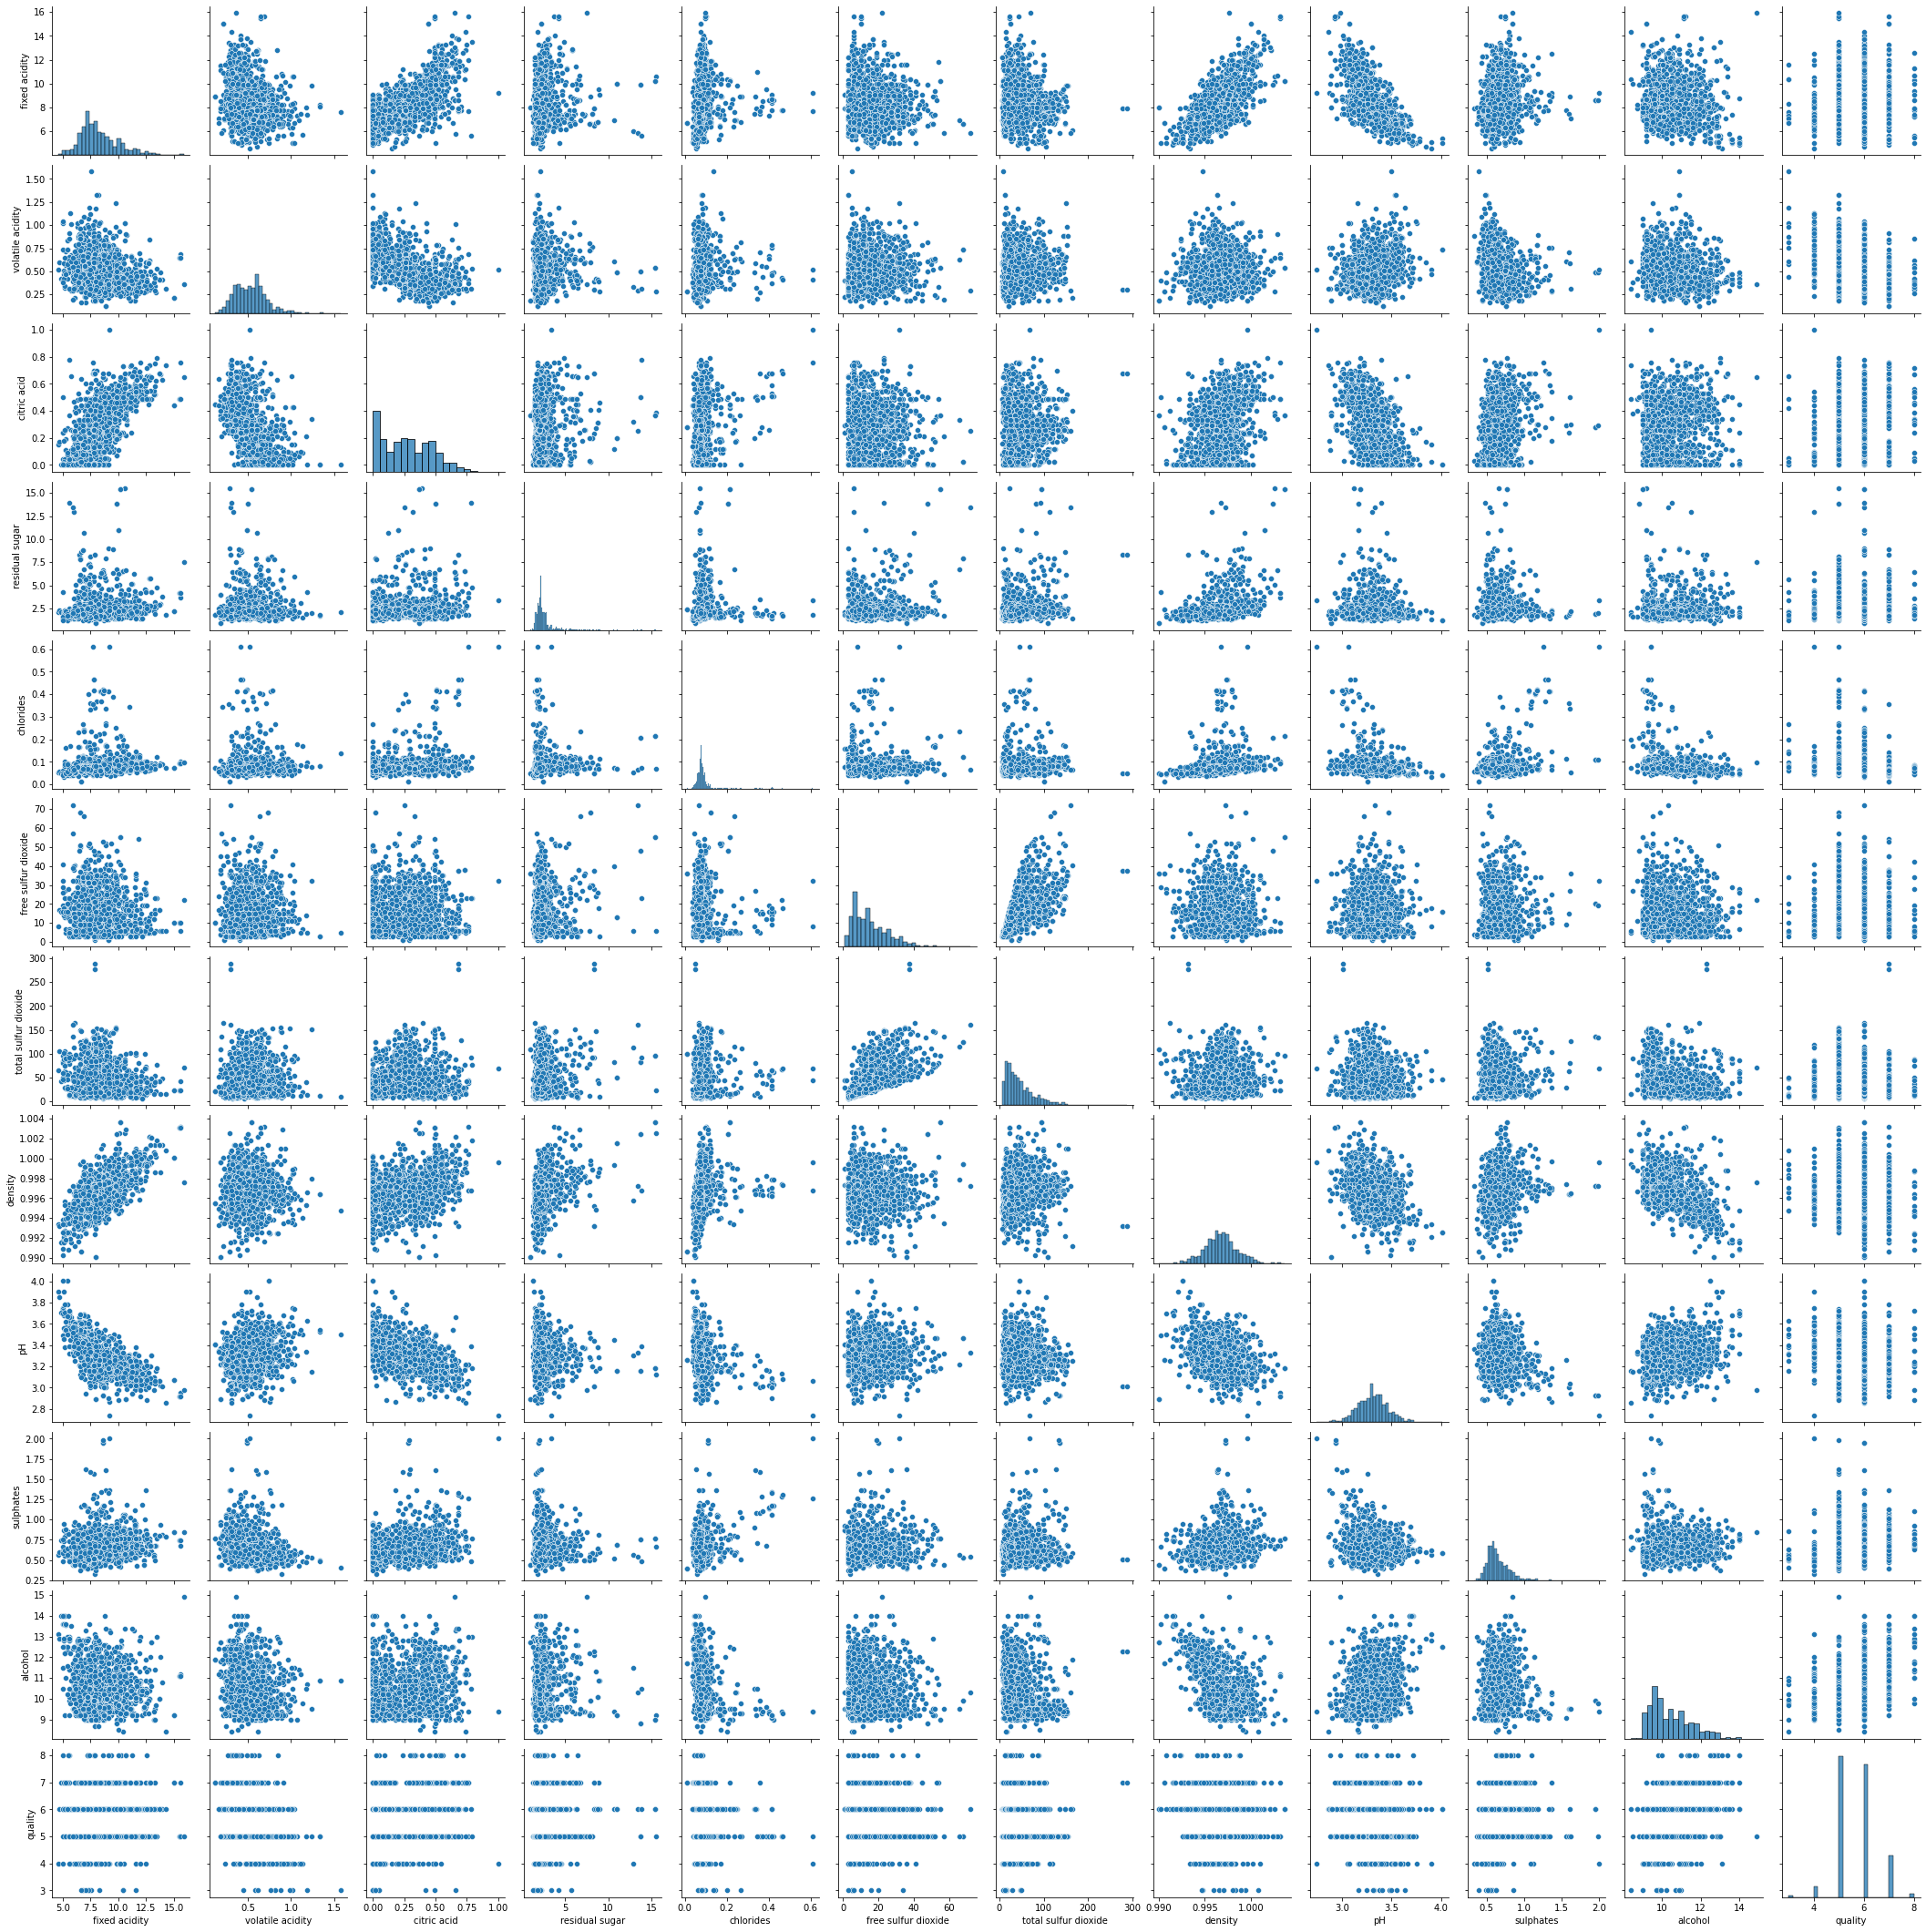

In [32]:
sns.pairplot(df)

# Checking the outliers with box plot

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

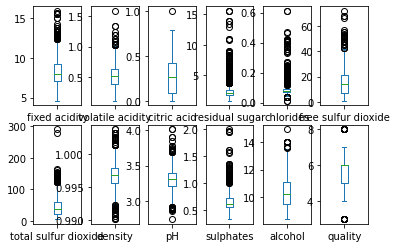

In [33]:

df.plot(kind='box',subplots=True,layout=(2,6))

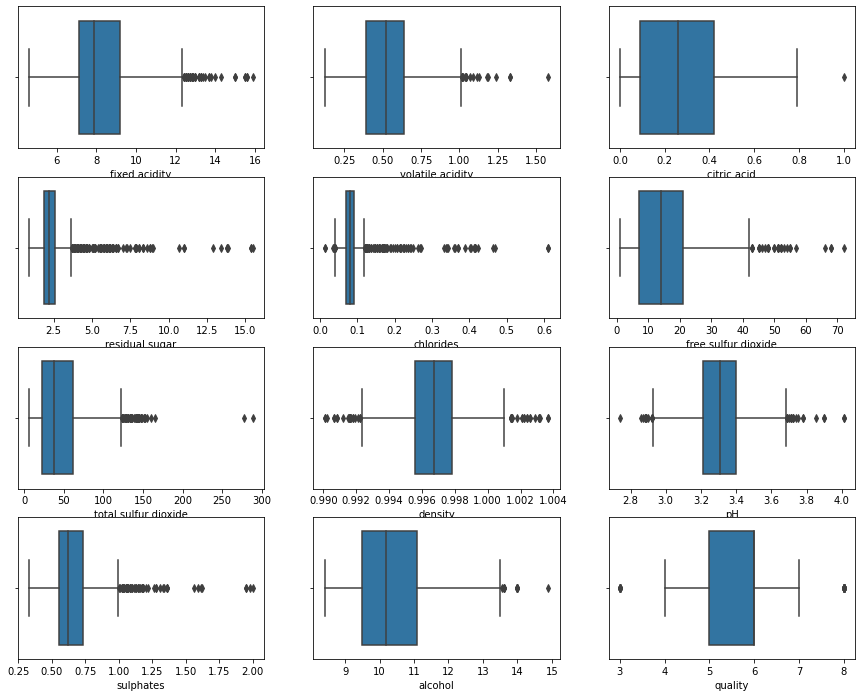

In [34]:
plt.figure(figsize=(15,12))
for i in enumerate(df.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(df[i[1]])

There are outliers present in every column data.

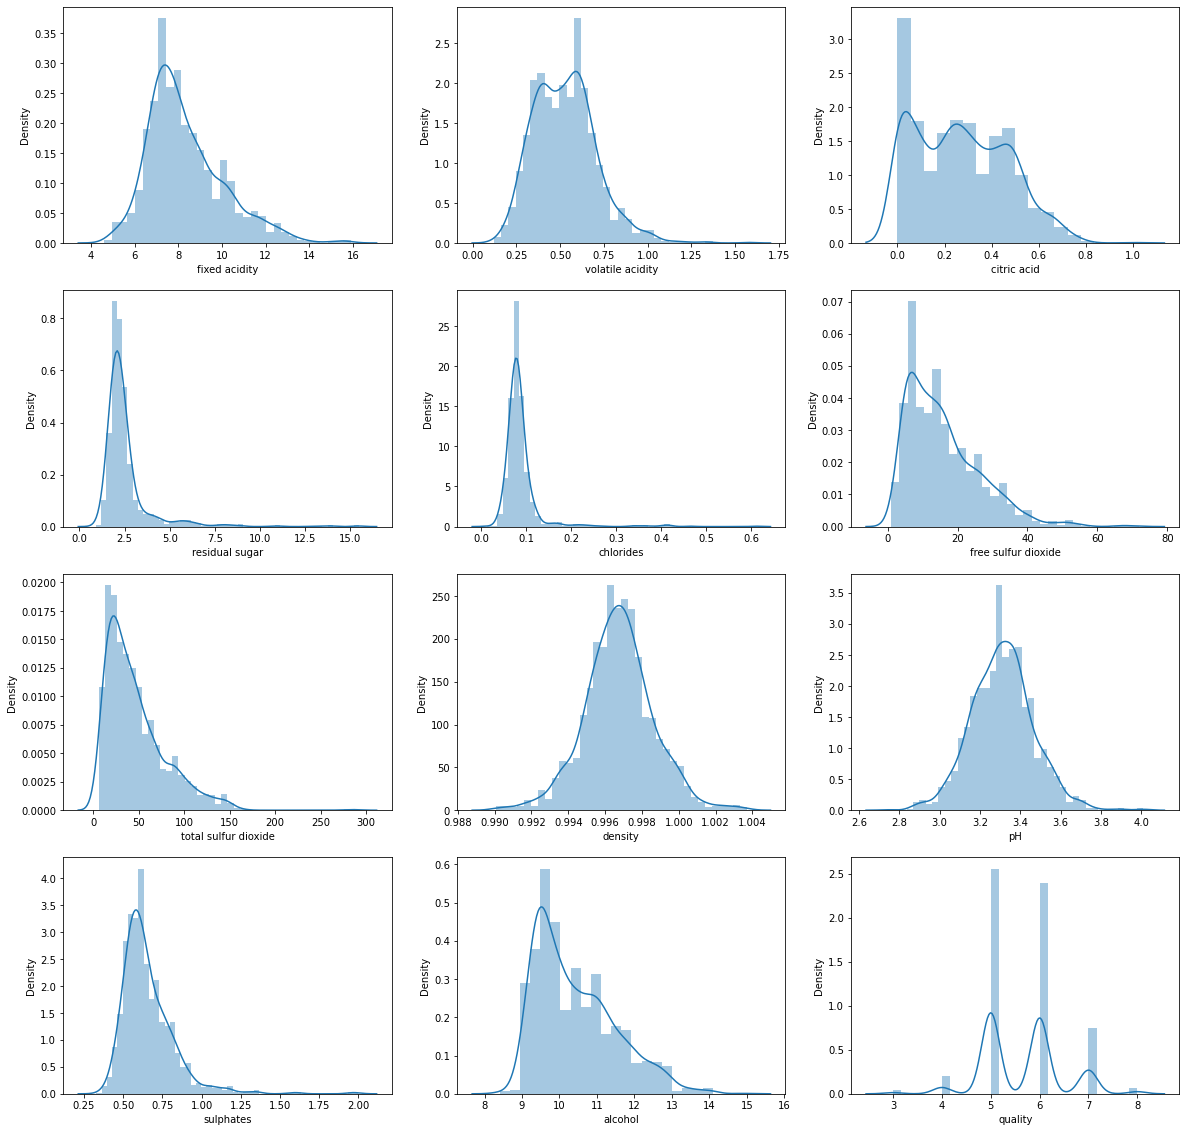

In [35]:
#to check the distribution of the data of each column

plt.figure(figsize=(20,20))
for i in enumerate(df.columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(df[i[1]])

Now we have to remove the outliers for removing the skewness from the dataset

# ZSCORE METHOD

In [37]:
from scipy.stats import zscore

# to get the zscore
z=np.abs(zscore(df))

In [38]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [39]:
z.iloc[3][3]

0.45321840673805114

In [40]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [41]:
#randomly checking the zscore
z.iloc[15][5]

3.359038194288537

In [42]:
z.iloc[1589][3]

3.732701384742145

In [43]:
z.iloc[14][5]

3.454668962073944

All the indexes got at >3 score are true and we need to remove these outliers from the data set

In [44]:
df.shape

(1599, 12)

In [45]:
#Removing the outliers data
df1=df[(z<3).all(axis=1)]

In [46]:
df1.shape

(1451, 12)

After removing the outliers the total rows in the dataset came to 1451, so 148 rows removed from dataset. New dataset is df1

Now we will try the outliers removal with IQR method, we will opt for less data loss option from IQR and Zscore

# IQR METHOD

In [47]:
from scipy import stats
IQR = stats.iqr(df)
IQR

8.31

In [48]:
Q1 = df.quantile(0.25)
Q3 =  df.quantile(0.75)

In [49]:
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(1233, 12)

Here there are 366 orows lost from the data set, so we will opt for ZSCORE method and we will take df1

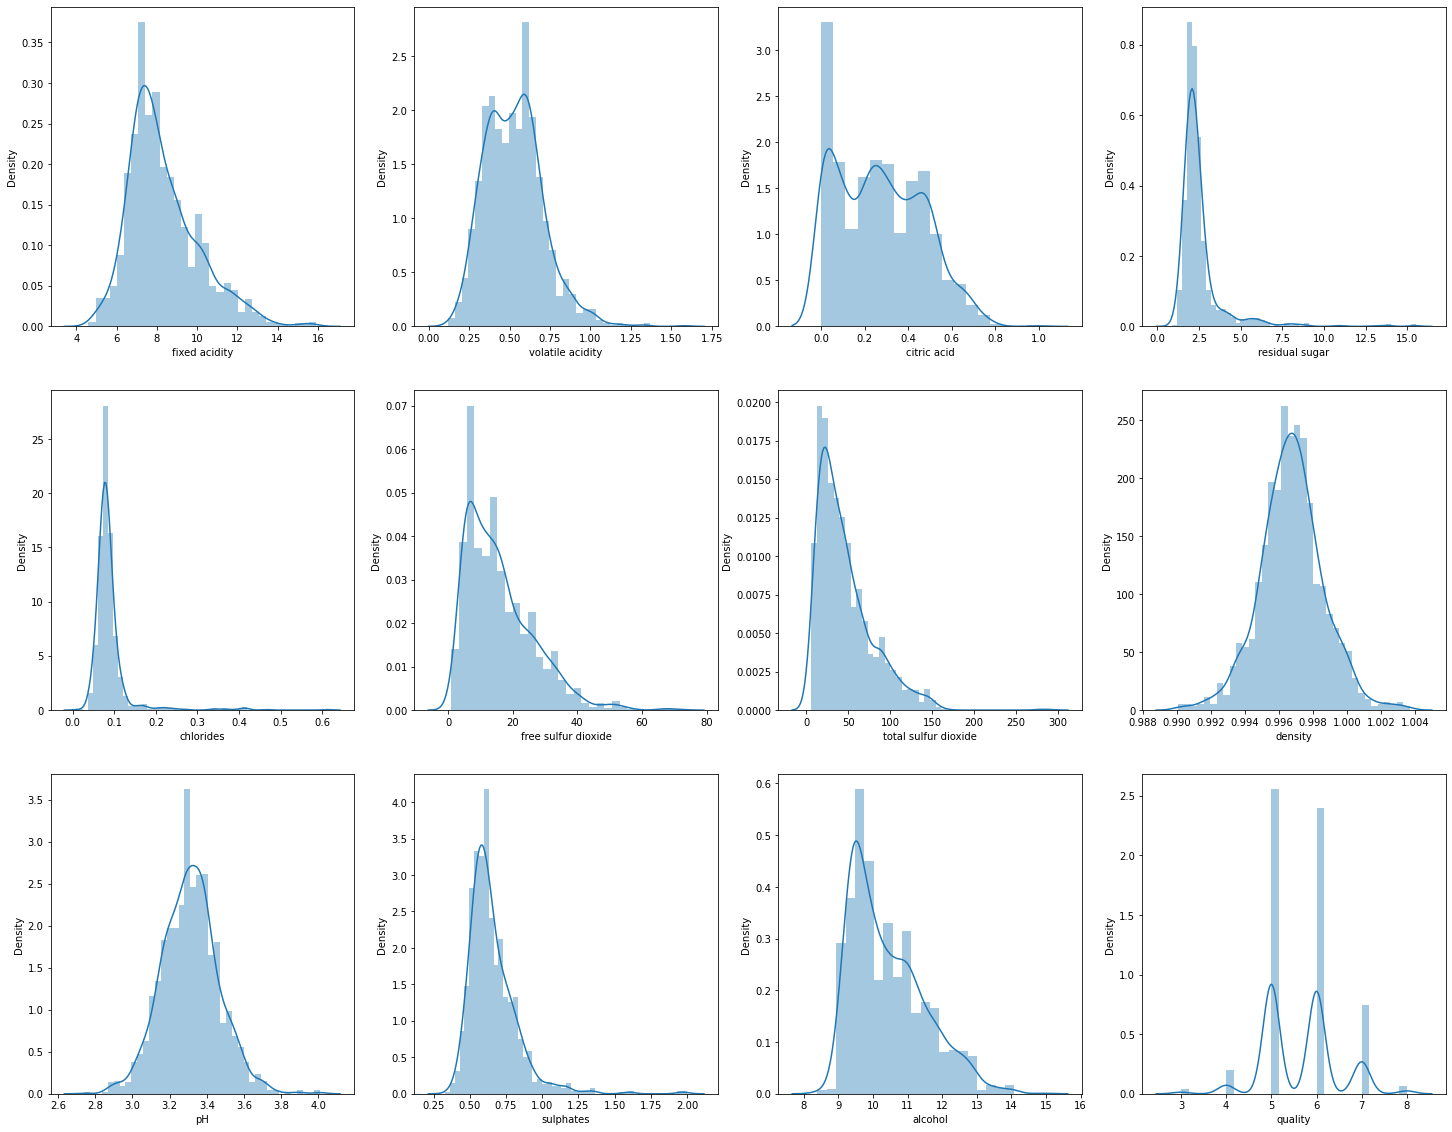

In [50]:
#to check the skewness
plt.figure(figsize=(25,20))
for i in enumerate(df1.columns):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]])

In [51]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [52]:
df1.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

So now we will remove the skeness from columns with more than +.5

In [53]:
from sklearn.preprocessing import power_transform
df1[['fixed acidity','free sulfur dioxide','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol']]=power_transform(df1[['fixed acidity','free sulfur dioxide','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol']])

In [54]:
df1.skew()

fixed acidity           0.018666
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                 0.055738
pH                      0.114705
sulphates               0.020799
alcohol                 0.114658
quality                 0.407865
dtype: float64

Now the skewness is removed from every column, Quality column is not treated as it is our target

In [55]:
(df1['quality']<7).value_counts()

True     1250
False     201
Name: quality, dtype: int64

In [56]:
(df1['quality']>=7).value_counts()

False    1250
True      201
Name: quality, dtype: int64

As we need to consider the quality 7 and above as good quality and below as poor quality wine
lets say quality 7 and above as 1
and quality below 7 as 0

In [57]:
#Tranforming the quality column as 0(Poor) and 1(Good)
df1.loc[(df1['quality'] < 7.0),'quality']=0.0
df1.loc[(df1['quality'] >=7.0),'quality']=1

In [58]:
df1.quality.value_counts()

0    1250
1     201
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

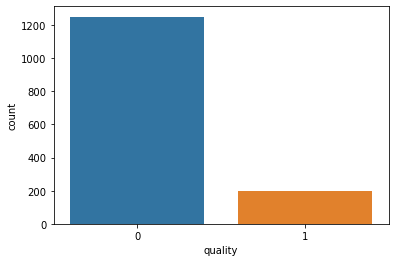

In [59]:
sns.countplot(df1['quality'])

In [60]:
#dividing the data into inputs and target as X, Y
x=df1.drop(['quality'],axis=1)
y=df1['quality']

In [61]:
x.shape

(1451, 11)

In [62]:
y.shape

(1451,)

there are very low number of observations or data for the good quality wine, so its unbalanced datset

using RandomOverSampler as there is very less data


In [63]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
#Now using the Random Over Sampler to get the data balanced
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x,y)
print('original Target dataset shape:', y.shape)
print('Resample Target dataset shape', y_ros.shape)

original Target dataset shape: (1451,)
Resample Target dataset shape (2500,)


In [66]:
x_ros.shape

(2500, 11)

In [67]:
#checking for the good and poor quality data balance
y_ros.value_counts()

0    1250
1    1250
Name: quality, dtype: int64

both are having equal amount of data, so its balanced now.

# Now splitting data set for  train and test 

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x_ros,y_ros,test_size=.3,random_state=42)

In [70]:
x_train.shape

(1750, 11)

In [71]:
x_test.shape

(750, 11)

In [72]:
y_train.shape

(1750,)

In [73]:
y_test.shape

(750,)

Now we have to check different models for performance train, test of the data

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [75]:
lr=LogisticRegression()
lr_score=cross_val_score(lr,x_ros,y_ros,cv=5,scoring='accuracy')
print('cross validation score for LR:',np.mean(lr_score))

cross validation score for LR: 0.7856


In [76]:
lr.fit(x_train,y_train)
LR_predicted=lr.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",lr.score(x_train,y_train))
print("Test accuracy::",lr.score(x_test,y_test))

0.7973333333333333
[[293  82]
 [ 70 305]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       375
           1       0.79      0.81      0.80       375

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750

Training accuracy:: 0.808
Test accuracy:: 0.7973333333333333


DECISION TREE CLASSIFIER

In [77]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.9376


In [78]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)

print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.9466666666666667
[[335  40]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       375
           1       0.90      1.00      0.95       375

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

Training accuracy:: 1.0
Test accuracy:: 0.9466666666666667


KNeighbors Classifier

In [79]:
knc=KNeighborsClassifier()
knc_score=cross_val_score(knc,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knc_score))

cross validation score for knn: 0.86


In [80]:
knc.fit(x_train,y_train)
predicted_knc=knc.predict(x_test)

print(accuracy_score(y_test,predicted_knc))
print(confusion_matrix(y_test,predicted_knc))
print(classification_report(y_test,predicted_knc))
print("Training accuracy::",knc.score(x_train,y_train))
print("Test accuracy::",knc.score(x_test,y_test))

0.8946666666666667
[[301  74]
 [  5 370]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       375
           1       0.83      0.99      0.90       375

    accuracy                           0.89       750
   macro avg       0.91      0.89      0.89       750
weighted avg       0.91      0.89      0.89       750

Training accuracy:: 0.9148571428571428
Test accuracy:: 0.8946666666666667


RandomForestClassifier

In [81]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.9516000000000002


In [82]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)

print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9693333333333334
[[355  20]
 [  3 372]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       375
           1       0.95      0.99      0.97       375

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750

Training accuracy:: 1.0
Test accuracy:: 0.9693333333333334


# ENSEMBLE TEQNIQUE

ADA BOOST

In [83]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_ros,y_ros,cv=10,scoring='accuracy')
print("cross validation score for Ada Boost :",np.mean(adb_score))

cross validation score for Ada Boost : 0.8560000000000001


In [84]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)

print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.876
[[317  58]
 [ 35 340]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       375
           1       0.85      0.91      0.88       375

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

Training accuracy:: 0.9005714285714286
Test accuracy:: 0.876


Bagging Classifier

In [85]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_ros,y_ros,cv=10,scoring='accuracy')
print("cross validation score for Bagging Classifier:",np.mean(bgc_score))

cross validation score for Bagging Classifier: 0.9600000000000002


In [86]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)

print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.9706666666666667
[[356  19]
 [  3 372]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       375
           1       0.95      0.99      0.97       375

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750

Training accuracy:: 0.9988571428571429
Test accuracy:: 0.9706666666666667


We take the Bagging classifier for hyper parameter tuning as the accuracies are good when compared to adaboost

# HYPER PARAMETER TUNING

In [88]:
bgc=BaggingClassifier()
param_grid={
    'n_estimators':[100,200],
    'max_features':[1,2]
}

In [89]:
bgc_grid=GridSearchCV(BaggingClassifier(),param_grid,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [90]:
bgc_grid.fit(x_train,y_train)
bgc_pred=bgc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,bgc_pred))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Accuracy after parameter tuning:: 0.988


Now accuracy is 0.992

In [91]:
#classification report

print("CLASSIFICATION REPORT::\n", classification_report(y_test,bgc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       375
           1       0.98      0.99      0.99       375

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



<AxesSubplot:>

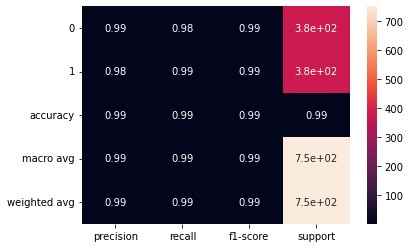

In [92]:
clsf_repo=classification_report(y_test,bgc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
print("roc auc score::",roc_auc_score(y_test,bgc_pred))

roc auc score:: 0.988


In [95]:
from sklearn.metrics import roc_curve

In [96]:
fpr1, tpr1, thresh1 = roc_curve(y_test, bgc_pred,pos_label=1)

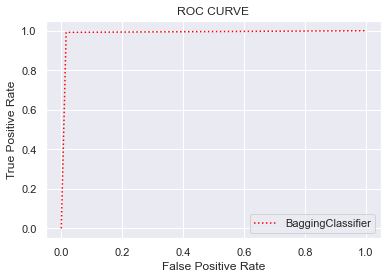

In [97]:
# plotting ROC CURVE
sns.set_theme(style='darkgrid')
plt.plot(fpr1, tpr1, linestyle=':',color='red', label='BaggingClassifier')

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

Saving The Model

In [98]:
import joblib
joblib.dump(bgc_grid.best_estimator_,'Red_Wine.obj')

['Red_Wine.obj']